In [10]:
import rubin_sim.maf.db as db
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.stackers as stackers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.batches as batches
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import sqlite3
db_name = '../data/baseline_v2.0_10yrs.db'
connection = sqlite3.connect(db_name)
c = connection.cursor()

# c.execute('select * from SummaryAllProps')

#print(c.execute("PRAGMA database_list;"))
#curr_table = c.fetchall()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())
# curr_table

c.execute("pragma table_info(observations)")
print(c.fetchall())
print(" ")

c.execute("select observationStartMJD, seeingFwhmGeom, skyBrightness, fieldRA, fieldDec from observations where filter = 'y' group by observationStartMJD")
results = c.fetchall()
mjd_y = [x[0] for x in results]
psf_y = [x[1] for x in results]
sb_y = [x[2] for x in results]
ra_y = [x[3] for x in results]
dec_y = [x[4] for x in results]
print(len(mjd_r))


c.execute("select note from observations limit 10")
print(c.fetchall())

"""
c.execute("select seeingFwhmGeom from observations where filter = 'z'")
psf_z = c.fetchall()
psf_z = [z[0] for z in psf_z]


print(len(psf_r), len(psf_i), len(psf_z))
"""


[('observations',), ('info',), ('Proposal',)]
[(0, 'observationId', 'INTEGER', 0, None, 0), (1, 'fieldRA', 'REAL', 0, None, 0), (2, 'fieldDec', 'REAL', 0, None, 0), (3, 'observationStartMJD', 'REAL', 0, None, 0), (4, 'flush_by_mjd', 'REAL', 0, None, 0), (5, 'visitExposureTime', 'REAL', 0, None, 0), (6, 'filter', 'TEXT', 0, None, 0), (7, 'rotSkyPos', 'REAL', 0, None, 0), (8, 'numExposures', 'INTEGER', 0, None, 0), (9, 'airmass', 'REAL', 0, None, 0), (10, 'seeingFwhm500', 'REAL', 0, None, 0), (11, 'seeingFwhmEff', 'REAL', 0, None, 0), (12, 'seeingFwhmGeom', 'REAL', 0, None, 0), (13, 'skyBrightness', 'REAL', 0, None, 0), (14, 'night', 'INTEGER', 0, None, 0), (15, 'slewTime', 'REAL', 0, None, 0), (16, 'visitTime', 'REAL', 0, None, 0), (17, 'slewDistance', 'REAL', 0, None, 0), (18, 'fiveSigmaDepth', 'REAL', 0, None, 0), (19, 'altitude', 'REAL', 0, None, 0), (20, 'azimuth', 'REAL', 0, None, 0), (21, 'paraAngle', 'REAL', 0, None, 0), (22, 'cloud', 'REAL', 0, None, 0), (23, 'moonAlt', 'REAL', 

'\nc.execute("select seeingFwhmGeom from observations where filter = \'z\'")\npsf_z = c.fetchall()\npsf_z = [z[0] for z in psf_z]\n\n\nprint(len(psf_r), len(psf_i), len(psf_z))\n'

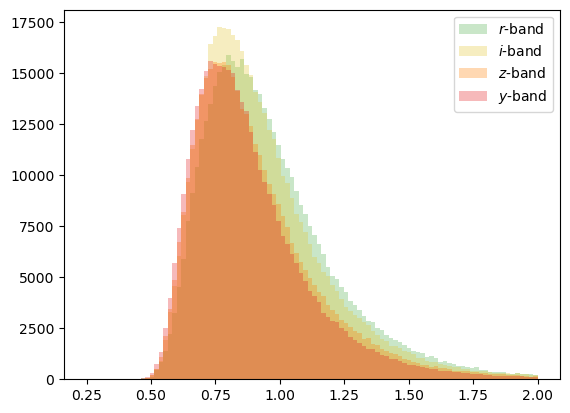

In [8]:
bins = 100
plt.figure()
plt.hist(psf_r, bins=bins, color='#4daf4a', alpha=0.3, label=r"$r$-band", range=(0.25, 2))
plt.hist(psf_i, bins=bins, color='#e3c530', alpha=0.3, label=r"$i$-band", range=(0.25, 2))
plt.hist(psf_z, bins=bins, color='#ff7f00', alpha=0.3, label=r"$z$-band", range=(0.25, 2))
plt.hist(psf_y, bins=bins, color='#e41a1c', alpha=0.3, label=r"$y$-band", range=(0.25, 2))
plt.legend()
plt.show()

In [11]:
np.savez("../data/LSST_baselinev20_seeing_distributions_grizy.npz", g=psf_g, r=psf_r, i=psf_i, z=psf_z, y=psf_y)

### Compare the mean and median seeing values with the ones from Yr 1:
http://astro-lsst-01.astro.washington.edu:8080/allMetricResults?runId=1#Seeinggeom

In [20]:
print(min(mjd_r) - max(mjd_r))
print(min(mjd_r))
mask_r = np.where(np.array(mjd_r) < (min(mjd_r) + 365))
mask_i = np.where(np.array(mjd_i) < (min(mjd_i) + 365))
mask_z = np.where(np.array(mjd_z) < (min(mjd_z) + 365))
mask_y = np.where(np.array(mjd_y) < (min(mjd_y) + 365))

print(np.median(np.array(psf_r)[mask_r]))
print(np.mean(np.array(psf_r)[mask_r]))
print(" ")
print(np.median(np.array(psf_i)[mask_i]))
print(np.mean(np.array(psf_i)[mask_i]))
print(" ")
print(np.median(np.array(psf_z)[mask_z]))
print(np.mean(np.array(psf_z)[mask_z]))
print(" ")
print(np.median(np.array(psf_y)[mask_y]))
print(np.mean(np.array(psf_y)[mask_y]))
print(" ")
print("They are the same!")

-3651.713498656907
60218.356920959006
0.8425159803652772
0.8907206358133919
 
0.8159057643088589
0.8668389785948534
 
0.7950666247317469
0.852124976895265
 
0.7763339144239125
0.8315021172174113
 
They are the same!


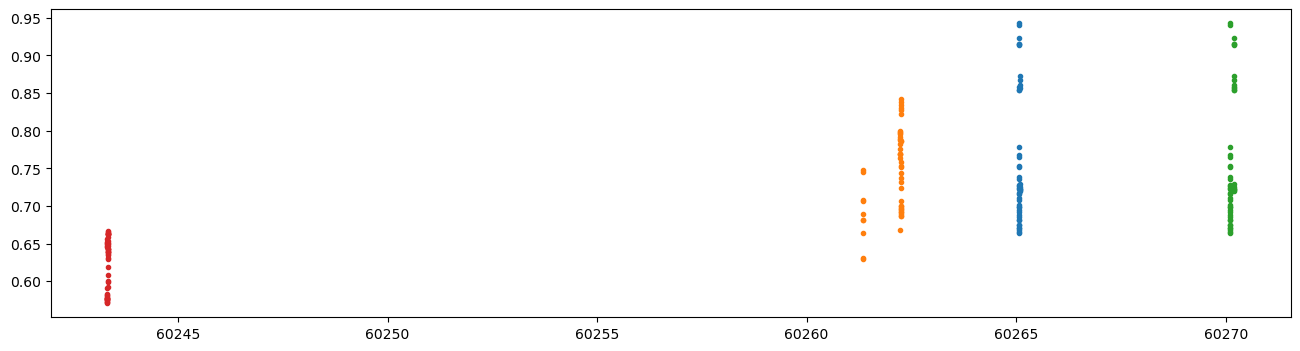

464851
[60265.06096857337, 60265.061418704114, 60265.06186859667, 60265.062323150596, 60265.06277184752, 60265.06321864894, 60265.06368987303, 60265.06414038183, 60265.06458819147, 60265.06503642782, 60265.06550311461, 60265.06596308097, 60265.06641035464, 60265.06685657255, 60265.06730333326, 60265.06774949073, 60265.068199443005, 60265.06864661029, 60265.06909401439, 60265.06954144831, 60265.069989602816, 60265.0704426092, 60265.070892614516, 60265.07134196618, 60265.07179057056, 60265.07223982556, 60265.072688741726, 60265.073138801316, 60265.073588690255, 60265.074040192594, 60265.074494484536, 60265.074959358535, 60265.07540855421, 60265.0758562235, 60265.07631223302, 60265.07676938553, 60265.07725078985, 60265.07771827907, 60265.07821646092, 60265.07869750378, 60265.07930389211, 60265.07996404698, 60265.080412373216, 60265.08086262129, 60265.081360352604, 60265.08180893749, 60265.082257845526, 60265.08270740186, 60265.0831558646, 60265.08361114278]
 
[5.18083802113363, 5.11783251

In [104]:
limit1 = 5450
limit2 = 5500

plt.figure(figsize=(16, 4))
#plt.plot(psf_r[:200], '.')
plt.plot(mjd_r[limit1:limit2], psf_z[limit1:limit2], '.')
plt.plot(mjd_i[limit1:limit2], psf_i[limit1:limit2], '.')
plt.plot(mjd_z[limit1:limit2], psf_z[limit1:limit2], '.')
plt.plot(mjd_y[limit1:limit2], psf_y[limit1:limit2], '.')
# plt.plot(sb_i[:200], '.')
#plt.plot(psf_z[:200], '.')
plt.show()

print(len(mjd_r))
print(mjd_r[limit1:limit2])
print(" ")
print(ra_r[limit1:limit2])
print(" ")
print(dec_r[limit1:limit2])

## Example from tutorial
https://github.com/LSST-nonproject/sims_maf_contrib/blob/master/tutorials/Introduction%20Notebook.ipynb

In [4]:
# metric = the "maximum" of the "airmass" for each group of visits in the slicer
metric1 = metrics.MaxMetric('airmass')

# slicer = a grouping or subdivision of visits for the simulated survey
# based on their position on the sky (using a Healpix grid)
slicer1 = slicers.HealpixSlicer(nside=64)

# sqlconstraint = the sql query (or 'select') that selects all visits in r band
sqlconstraint = 'filter = "r"'

# MetricBundle = combination of the metric, slicer, and sqlconstraint
maxairmassSky = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

opsdb = db.OpsimDatabase('../data/baseline_v2.0_10yrs.db')
outDir = 'output_directory'
resultsDb = db.ResultsDb(outDir=outDir)

In [6]:
bundleDict = {'maxairmassSky': maxairmassSky}

In [7]:
group = metricBundles.MetricBundleGroup(
    bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
group.runAll()

Querying table None with constraint filter = "r" for columns ['fieldRA', 'fieldDec', 'airmass', 'rotSkyPos']
Found 464851 visits
Running:  ['maxairmassSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter = "r"" constraint now.
Plotting complete.


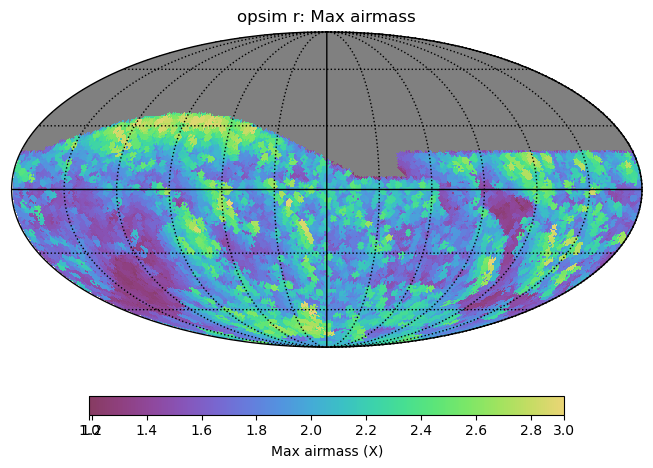

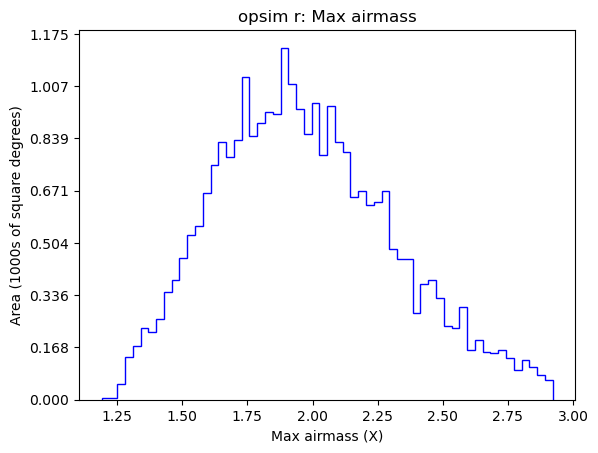

In [8]:
group.plotAll(closefigs=False)